In [1]:
import numpy as np
from math import factorial
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')   

# OPTION PRICING BY BRANCHING PROCESS
### Authors: Georgi Mitov and Kosto Mitov

* Lucas Schmidt Ferreira de Araujo

* Grzegorz Buczek

* Zofia Gornikowska

* Jacek Pazdzierkiewicz

#### Introduction 

In financial markets, options are critical tools for hedging and speculation, with European call options allowing the purchase of an asset at a fixed price on a future date. The Black-Scholes model provides a widely used formula for pricing options but relies on assumptions such as continuous price paths, normal log-returns, and constant volatility.

Empirical evidence often contradicts these assumptions, as stock prices are discrete and exhibit heavy-tailed distributions. To address these limitations, the paper proposes a Galton-Watson branching process subordinated by a Poisson process. This model captures the discreteness of stock prices and accounts for market features like volatility variability and the risk of extinction, offering a more realistic approach to option pricing.

The following report outlines the structure and assumptions of this branching process model.

The classical Black-Scholes equation which describes the time evolution value of an option relies in the Brownian motion assumption for the underlying price $S(t)$. This assumption however implies that

* trading takes place continuously in time;
* the price dynamics of the stock have a continuous sample path with probability one;
* the distribution of log-returns is normal with constant volatility

The paper cites many empirical investications that doesnt agree with these assumptions. The authors also note, against the first implication, that stock prices are measured in units of 1/16$, what make them discrete variables. 


# Randomly indexed branching process

The authors construct a Galton-Watson branching process model subordinated with the Poisson process based on the following assumptions


* The offspring of a particle in the branching process has the two parameter
geometric distribution [1]

$$
\begin{aligned}
& \operatorname{Pr}\left(Z_{n+1}=0 \mid Z_n=1\right)=(1-a) \\
& \operatorname{Pr}\left(Z_{n+1}=k \mid Z_n=1\right)=a p(1-p)^{k-1}, \quad k=1,2, \ldots, \\
& 0<a<1, \quad 0<p<1
\end{aligned}
$$
where\
$a$ controls the likelihood of having at least one offspring,\
$p$ determines the kwewness of the offspring distribution.


* The randomly indexed branching process is subordinated by a Poisson process $N(t)$ with intensity $\lambda > 0$.


$$ S(t) = Z_{N(t)} $$

with probability generating function of the offspring distribution

$$ f(s) = 1-a + \frac{aps}{1 - (1-p)s} $$

It is easy that the first moment and second moments $m,b$ are given by the relation

$$ m = f'(1) = \frac{a}{p} , \quad b = f''(1) = 2m \frac{1-p}{p}$$

Also, it is known the Iterates Theorem from the Branching Process literature

$$ f_n(s) = f( f_{n-1}(s) ) $$

Then we have: [1]

$$
f_n(s)=E\left[s^{Z_n} \mid Z_0=1\right]=1-\frac{m^n(1-s)}{1+\frac{b}{2 m} \frac{1-m^n}{1-m}(1-s)}
$$

Since $Pr(Z_n = k | Z_0 = 1) = \frac{f_n^{(k)}(0)}{k!}$, we have [1]

$$
\operatorname{Pr}\left(Z_n=k \mid Z_0=1\right)=\frac{m^n\left[\frac{b\left(1-m^n\right)}{2 m(1-m)}\right]^{k-1}}{\left[1+\frac{b\left(1-m^n\right)}{2 m(1-m)}\right]^{k+1}}
\quad \forall k = 1,2,3,...$$

$$
\operatorname{Pr}\left(Z_n=k \mid Z_0=1\right)= 1-\frac{m^n}{1+\frac{b\left(1-m^n\right)}{2 m(1-m)}} , \quad k = 0
$$


# Pricing of European call option

The call option price at time $0 \leq t <T$ is

$$C(T ; t)=e^{-r(T-t)} E^Q[\max (0, S(T)-K)]$$

The paper cites 8 assumptions in order to construct the Black-Scholes Model

* The stock price follows a geometric Brownian motion, where μ and σ are constants.
* The short selling of securities with the full use of proceeds is permitted.
* There are no transactions costs or taxes.
* All securities are perfectly divisible.
* There are no dividends during the life of the derivative.
* There are no riskless arbitrage opportunities (the no-arbitrage principle).
* Security trading is continuous.
* The riskfree rate of interest r is constant and the same for all maturities.


## Brownian Motion approach

According the Black-Scholes model, the Brownian motion assumption is one of the needed assumptions:

$$ S(t) = S(0) exp( \mu t + \sigma W_t ) , t \in [0,T] $$

Then, we have the classical result

$$
\begin{aligned}
C(T ; t) & =S(t) N\left(d_1\right)-K e^{-r(T-t)} N\left(d_2\right), \\
d_1 & =\frac{\ln \frac{S(t)}{K}+\left(r+\frac{1}{2} \sigma^2\right)(T-t)}{\sigma \sqrt{T-t}}, \\
d_2 & =\frac{\ln \frac{S(t)}{K}+\left(r-\frac{1}{2} \sigma^2\right)(T-t)}{\sigma \sqrt{T-t}},
\end{aligned}
$$

## Branching Process Approach [1]

From martingales arguments, we have the relation

$$ r = \lambda(m-1) $$

Also, plugging the previous formulas, we have

$$ C(T ; 0)=e^{-r T} E[\max \{S(T)-K, 0\} \mid S(0)] =  $$

$$
= S(0)-e^{-r T} K + e^{-(r+\lambda) T} \sum_{n=0}^{\infty} \frac{(\lambda T)^n}{n!} \sum_{k=0}^K(K-k) \operatorname{Pr}\left(Z_n=k \mid Z_0\right)
$$

With the recurrence formula

$$
 \operatorname{Pr}\left(Z_n=k \mid Z_0=S(0)\right) 
= \sum_{j=0}^k P\left(Z_n=j \mid Z_0=S_0-1\right) P\left(Z_n=k-j \mid Z_0=1\right) \quad 
\forall k=0,1,2, \ldots, K .
$$

Also, the mean and variance of the process $S(t)$ are given in paper [2]

$$ M(t)=\mathbb{E}[S(t)]=S(0) e^{\lambda t(m-1)} $$

$$
\sigma^2(t) =\operatorname{Var}[S(t)] = S(0)^2\left[e^{\lambda t\left(m^2-1\right)}-e^{2 \lambda t(m-1)}\right]+\frac{S(0) \sigma^2\left[e^{\lambda t\left(m^2-1\right)}-e^{\lambda t(m-1)}\right]}{m(m-1)}
$$

In [2]:
def Call_BlackScholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)


In [3]:
def pkn_1(k, n, m, b):
    """
    Calculate a probabilistic function based on the parameters `k`, `n`, `m`, and `b`.
    Args:
        k (array-like): Array of integers representing discrete states.
        n (int): Power/exponent that determines the depth or level of computation.
        m (float): Average offspring number. It is also the first moment of ofsspring pgf
        b (float): Second moment of ofsspring pgf
    Returns:
        numpy.ndarray: Computed probabilities for each value in `k`.
    """
    k = np.asarray(k)
    if n == 0:
        return np.where(k == 1, 1.0, 0.0)
    m_n = m**n
    term = (b * (1 - m_n)) / (2 * m * (1 - m))
    result = np.zeros_like(k, dtype=float)
    result[k == 0] = 1 - m_n / (1 + term)
    k_pos = k > 0
    num = m_n * (term**(k[k_pos] - 1))
    den = (1 + term)**(k[k_pos] + 1)
    result[k_pos] = num / den
    return result
def pkn_z0(k, n, m, b, z0):
    """
    Computes the probability distribution at generation n given that the proces starts with Z0 particles.
    Args:
        k (int): The maximum state or event index.
        n (int): The power/exponent that controls the scaling of the distribution.
        m (float): Average offspring number. It is also the first moment of ofsspring pgf
        b (float): Second moment of ofsspring pgf
        z0 (int): Inital number of particles in the process. Also is the initial price
    Returns:
        numpy.ndarray: The final computed probability distribution after `z0` iterations.
    """
    pkn = np.zeros((z0, k+1))
    pkn[0] = pkn_1(np.arange(k+1), 1, m, b)
    for z0_ in range(1, z0):
        for k_ in range(k+1):
            j_values = np.arange(k_ + 1)
            pkn[z0_, k_] = np.sum(
                pkn[z0_ - 1, j_values] * pkn_1(k_ - j_values, n, m, b)
            )
    return pkn[-1]
def Branching(N, K, T, lamb, PKNZ0):
    """
    Computes a branching process probability distribution.
    Args:
        N (int): The number of events or particles.
        K (int): The maximum state or event index.
        T (float): A time or scaling factor influencing the distribution.
        lamb (float): The rate parameter influencing the growth or decay.
        PKNZ0 (array-like): A probability distribution array calculated at depth `z0`.
    Returns:
        float: The computed branching process value.
    """
    v1 = K - np.arange(K+1)
    v2 = PKNZ0
    S1 = np.sum(v1 * v2)
    return S1 * (lamb * T) ** N / factorial(N)
def Call_Branching(T, K, z0, alfa, r, m, b, lamb, N=20):
    exp_rT = np.exp(-r * T)
    exp_lambT = np.exp(-(r + lamb) * T)
    s0 = alfa * z0 - exp_rT * K
    
    PKNZ0 = pkn_z0(K, N, m, b, z0)
    s1 = exp_lambT * sum(Branching(n, K, T, lamb, PKNZ0) for n in range(N + 1))
    
    return s0 + s1


In [4]:
a = 0.9877
p =  0.9878
lamb = 1
alfa = 1/1
s0 = 20
z0 = int( s0/alfa )
m = a / p
b = 2*(1-p) * m / p
sigma = np.sqrt( b+m - m**2 )
r = lamb * ( m-1 )
T = np.linspace(.1,1,20)
K = np.arange(5,100)
calls_branching1 = np.zeros( (len(T) , len(K)) )
calls_branching2 = np.zeros( (len(T) , len(K)) )
calls_branching3 = np.zeros( (len(T) , len(K)) )
calls_BlackScholes = np.zeros( (len(T) , len(K)) )
for i,t in enumerate( T ):
    for j,k in enumerate( K ):
        calls_branching1[i,j] = Call_Branching(t,k,z0, alfa, r, m , b , lamb , N = 5)
        calls_branching2[i,j] = Call_Branching(t,k,z0, alfa, r, m , b , lamb , N = 20)
        calls_branching3[i,j] = Call_Branching(t,k,z0, alfa, r, m , b , lamb , N = 35)
        calls_BlackScholes[i,j] = Call_BlackScholes(z0,k,t,r, sigma )

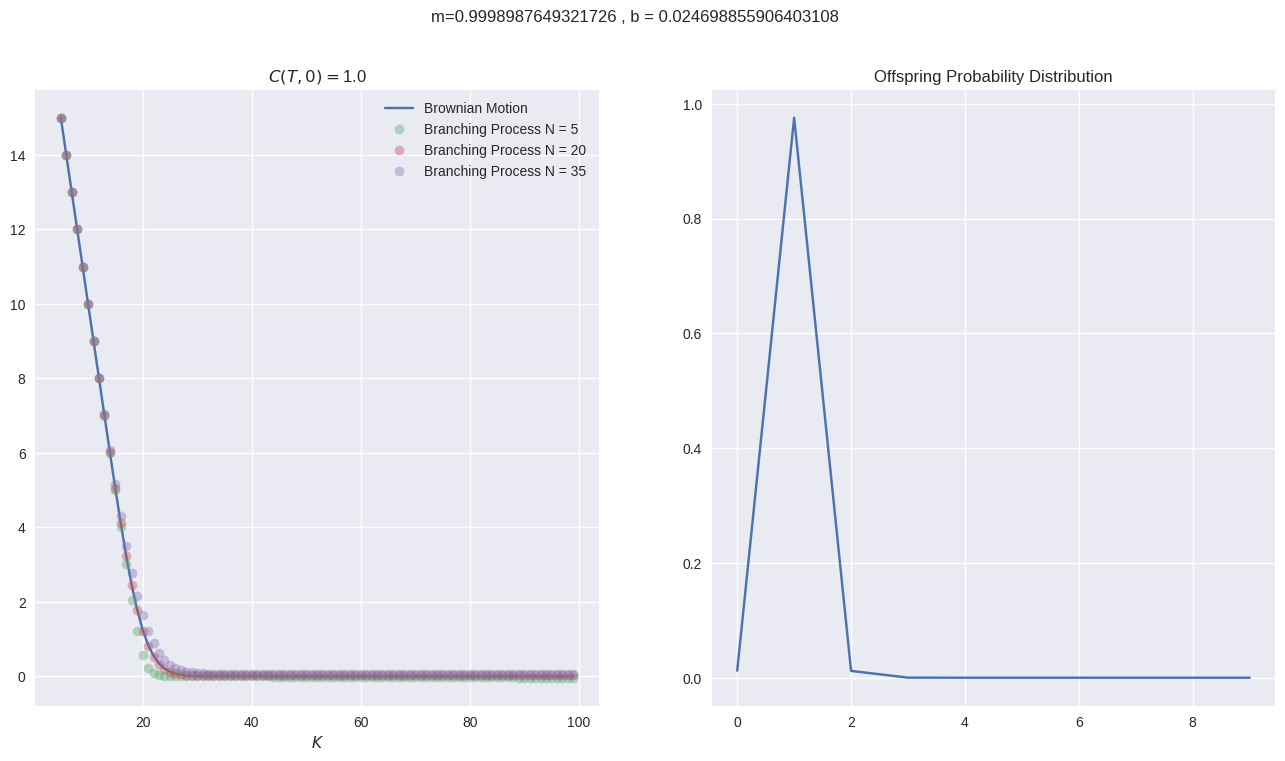

In [5]:
fig , axes = plt.subplots( 1,2 , figsize = (16,8) )
axes[0].plot( K , calls_BlackScholes[-1] , label = "Brownian Motion" ) 
axes[0].plot( K , calls_branching1[-1] , "o" , label = "Branching Process N = 5" , alpha = .4 )
axes[0].plot( K , calls_branching2[-1] , "o" , label = "Branching Process N = 20" , alpha = .4 )
axes[0].plot( K , calls_branching3[-1] , "o" , label = "Branching Process N = 35" , alpha = .4 )
axes[0].set_xlabel("$K$")
axes[0].set_title(f"$C(T,0) = ${T[-1]}")
axes[0].legend()
axes[0].grid(True)
axes[1].plot( np.arange(0,10) , pkn_1(np.arange(0,10) , 1 , m , b))
axes[1].set_title("Offspring Probability Distribution")
plt.suptitle(f"m={m} , b = {b}")
plt.show()

# Monte Carlo Simulation

## Galton-Watson Process [1]
The Galton-Watson process is constructed based on the following recurrence formula

$$ Z_0 = S(0) $$

$$ Z_{t+1} = \sum_{j=0}^{Z_t} \xi_j , \quad \{ \xi_j:n , j \in N  \} , \quad \xi_j \text{ has pgf } f(s) $$

## Extinction Probability

The probability that no particle will be alive at generation n, given that it starts only with one particle is

$$ q(n) =\operatorname{Pr}\left(Z_n=k \mid Z_0=1\right)= 1-\frac{m^n}{1+\frac{b\left(1-m^n\right)}{2 m(1-m)}} $$

However, probability that no particle will be alive at generation n, given that it starts with $Z_0$ particles is

$$ q(n | Z_0) = \operatorname{Pr}\left(Z_n=k \mid Z_0\right) = \operatorname{Pr}\left(Z_n=k \mid Z_0=1\right)^{Z_0} = (1-\frac{m^n}{1+\frac{b\left(1-m^n\right)}{2 m(1-m)}})^{Z_0}$$

In [6]:
def Branching_Process(nt, m, b, z0, Kmax=10):
    """
    Simulates a branching process over `nt` time steps.
    Args:
        nt (int): The number of time steps for the simulation.
        m (float): Average offspring number. It is also the first moment of ofsspring pgf
        b (float): Second moment of ofsspring pgf
        z0 (int): Inital number of particles in the process. Also is the initial price
        Kmax (int, optional): The maximum number of offspring (default is 10).
    Returns:
        numpy.ndarray: An array representing the number of individuals at each time step.
    """
    Z = np.zeros(nt, dtype=int)
    Z[0] = z0
    offspring = np.arange(Kmax)
    offspring_prob = pkn_1(offspring, 1, m, b)
    offspring_prob /= offspring_prob.sum()
    for t in range(nt - 1):
        Z[t + 1] = np.random.choice(offspring, p=offspring_prob, size=Z[t]).sum()
    return Z
def expectation(t, z0):
    return z0 * np.exp(t * (m - 1))
def variance(t, z0):
    term1 = np.exp(t * (m**2 - 1)) - np.exp(2 * t * (m - 1))
    term2 = np.exp(t * (m**2 - 1)) - np.exp(t * (m - 1))
    s1 = z0**2 * term1
    s2 = z0 * sigma**2 * term2 / (m * (m - 1))
    return s1 + s2
def MC_Branching(nt, m, b, z0, k, nsim=500):
    Z = np.array([Branching_Process(nt, m, b, z0) for _ in range(nsim)]).T
    return np.maximum(Z[-1] - k, 0).mean()
def p0(m, n, b):
    return 1 - (m**n) / (1 + b * (1 - m**n) / (2 * m * (1 - m)))
def q(m,n,b,z0):
    return p0(m, n, b) ** z0

In [14]:
nt = 600
nsim = 6000
Z = np.array( [Branching_Process( nt , m , b , z0) for _ in range(nsim)] ).T
mc_branching = np.array( [MC_Branching(10 , m , b , z0 , k) for k in range(100)] )
p0_simulation = (Z == 0).sum( axis = 1) / nsim
p0_analytical = q( m , np.arange(nt) , b , z0 )

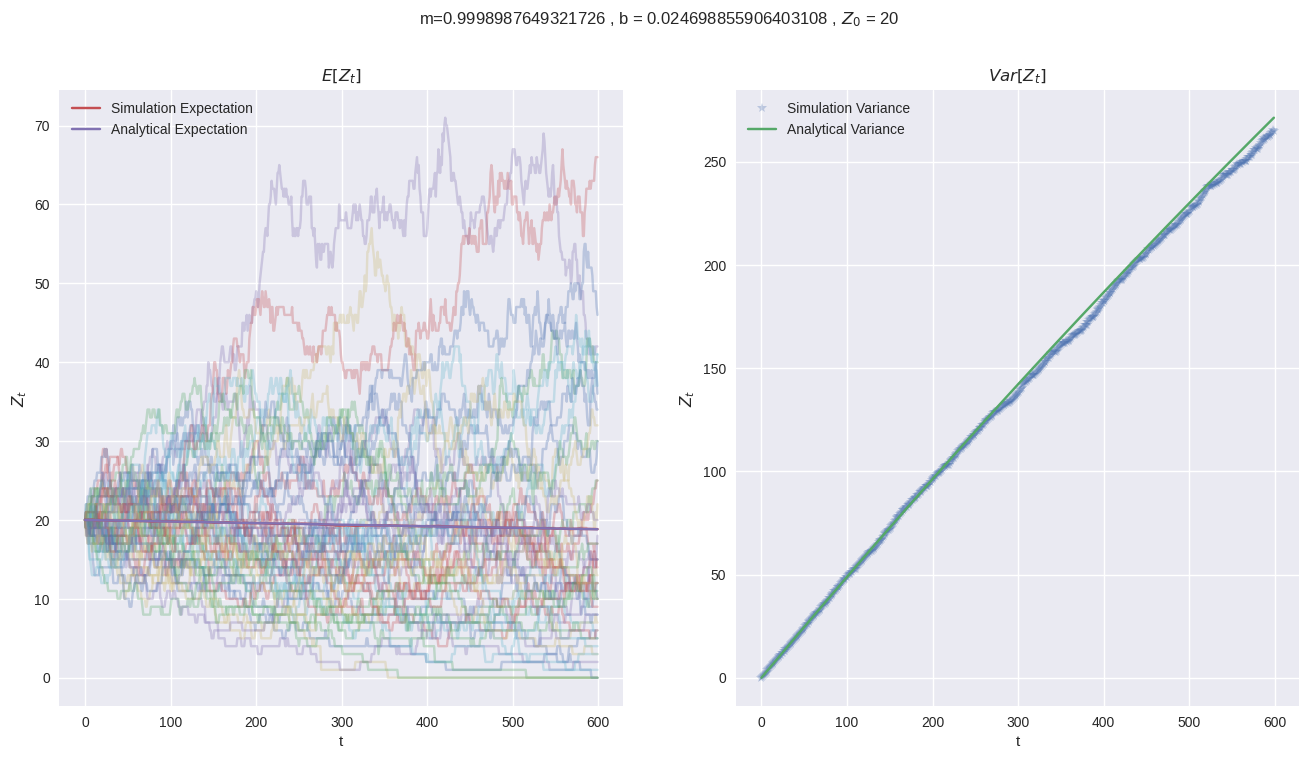

In [11]:
fig , axes = plt.subplots( 1 , 2 , figsize = (16,8) )
axes[0].plot( Z[:,:50] ,alpha = .3)
axes[0].plot( Z.mean(axis = 1) , label = "Simulation Expectation")
axes[0].plot( expectation( np.arange(nt),z0 ) , label = "Analytical Expectation" )
axes[0].legend()
axes[0].set_xlabel("t")
axes[0].set_ylabel("$Z_t$")
axes[0].set_title("$E[Z_t]$")
axes[1].plot( Z.var( axis = 1) , "*" , alpha = .3 ,label = "Simulation Variance" )
axes[1].plot( variance(np.arange(nt) , z0)  , label = "Analytical Variance")
axes[1].legend()
axes[1].set_xlabel("t")
axes[1].set_ylabel("$Z_t$")
axes[1].set_title("$Var[Z_t]$")
plt.suptitle( f"m={m} , b = {b} , $Z_0$ = {z0}" )
plt.show()

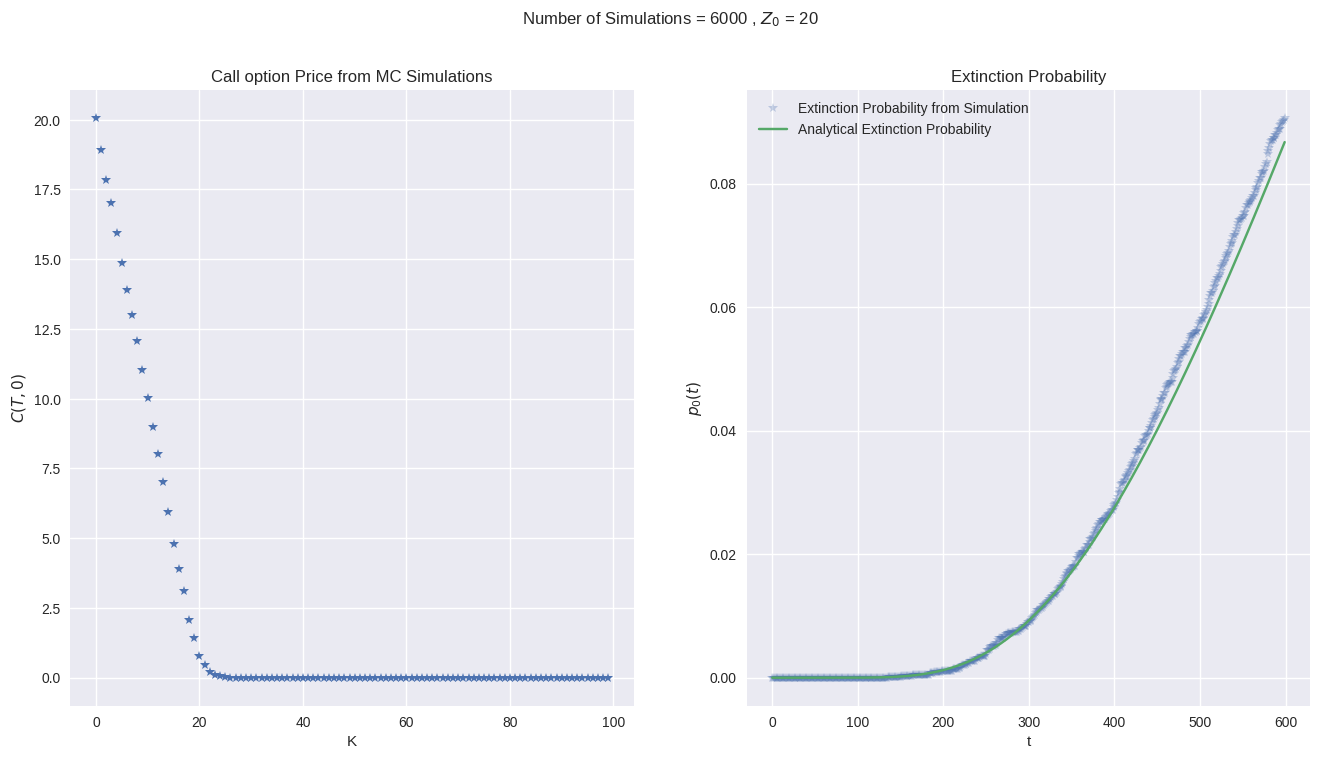

In [17]:
fig , axes = plt.subplots( 1,2 , figsize=(16,8) )
axes[0].plot(mc_branching , "*")
axes[0].set_xlabel("K")
axes[0].set_ylabel("$C(T,0)$")
axes[0].set_title( "Call option Price from MC Simulations" )
axes[1].plot(p0_simulation , "*" , alpha = .3 , label = "Extinction Probability from Simulation")
axes[1].plot(p0_analytical , label = "Analytical Extinction Probability")
axes[1].set_xlabel("t")
axes[1].set_ylabel("$p_0(t)$")
axes[1].set_title( "Extinction Probability" )
axes[1].legend()
plt.suptitle(f"Number of Simulations = {nsim} , $Z_0$ = {z0}")
plt.savefig("../../Figures/branching_process.png")
plt.show()

## Bibliography 

[1] Mitov, Georgi, and Kosto Mitov. "Option pricing by branching process." Pliska Studia Mathematica Bulgarica 18.1 (2007): 213p-224p.

[2] Mitov, Georgi K., et al. "Barrier option pricing by branching processes." International Journal of Theoretical and Applied Finance 12.07 (2009): 1055-1073.